Viz Features to work on:
- publish as both HTML and jupyter on github

Additional columns to work on
- isLocal, locale (country)
- human language

Nits
- set x ticks on dates to line up with bins

Export using
```
jupyter nbconvert --no-input covid-project-report.ipynb --to html --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}'
```


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FixedLocator, LogLocator
from IPython.display import Markdown as md
import numpy as np
import seaborn as sns
import datetime

# CONFIGURATION
date_github_published = '2020-07-13'


COMMA_FMT = StrMethodFormatter('{x:,g}')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title#set ticks every week


In [2]:
# print(date_github_published)
projects = pd.read_csv(date_github_published+'.tsv', sep='\t')
# convert string dates to datetime
projects['repo_created_day'] = pd.to_datetime(projects['repo_created_day'], format='%Y-%m-%d')

md("""
# Github covid-19-repo-data summarizer

This is a summary of the data on Github projects related to COVID-19 posted at https://github.com/github/covid-19-repo-data.

There are {} projects as of Github data release date: {}
""".format(f'{len(projects.index):,}',date_github_published))


# Github covid-19-repo-data summarizer

This is a summary of the data on Github projects related to COVID-19 posted at https://github.com/github/covid-19-repo-data.

There are 92,808 projects as of Github data release date: 2020-07-13


In [3]:
##########################
#print(projects.dtypes)
#print(type(projects['repo_created_day'][0]).__name__)
#projects.head()

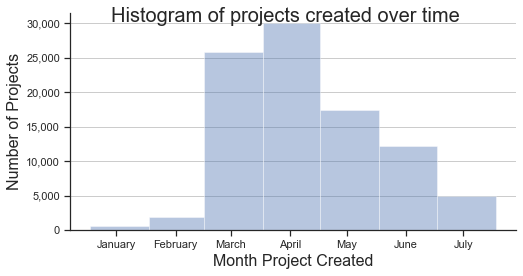

In [12]:
#plot data
months = range(1,9)
first_of_months = [ datetime.date.toordinal(datetime.date(2020, month, 1)) for month in months]
fig, ax = plt.subplots(figsize=(8,4))
fig.suptitle('Histogram of projects created over time', y=.9)
# projects['repo_created_day'].hist(bins=10, ax=ax)
sns.distplot(projects['repo_created_day'].dt.date.apply(datetime.date.toordinal), bins=first_of_months, ax=ax, kde=False, norm_hist=False)
sns.despine()
# print(projects['repo_created_day'].dt.date.apply(datetime.date.toordinal))
middle_of_months = [ first+14 for first in first_of_months ]
ax.xaxis.set_major_locator(FixedLocator(middle_of_months))
ax.set_xticklabels([datetime.date.fromordinal(int(item)).strftime('%B') for item in ax.get_xticks()])
ax.yaxis.set_major_formatter(COMMA_FMT)
ax.set_xlabel('Month Project Created', fontsize=16)
ax.set_ylabel('Number of Projects', fontsize=16)
plt.grid(axis='y')
plt.show()
#ax.xaxis.set_major_locator(mdates.DayLocator())
#set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))



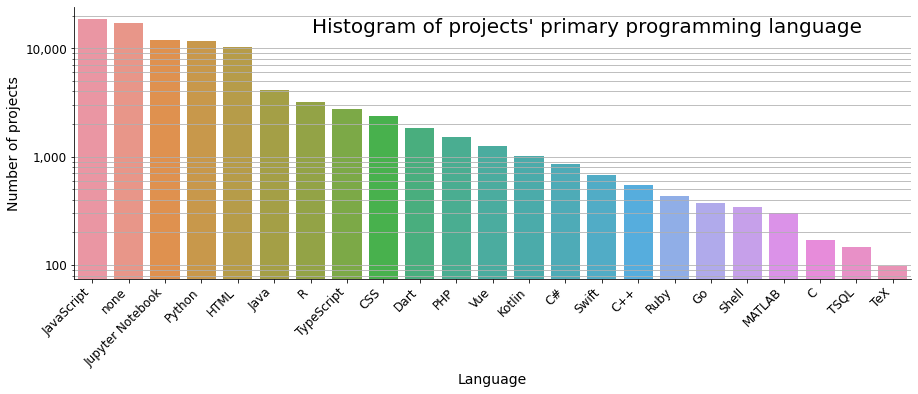

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
#plot = projects['primary_language_name'].fillna('none').astype('category').hist(,ax=ax)
categories = projects['primary_language_name'].fillna('none').value_counts()
multicats = categories[categories > 75]
# print(multicats.head())
# multicats.plot.bar(x='lab', y='val', rot=75)

sns.barplot(ax=ax, x=multicats.index, y=multicats.values)

fig.suptitle('Histogram of projects\' primary programming language', x=.6, y=.85)
ax.set_yscale("log")
ax.set_xlabel('Language')
ax.set_ylabel('Number of projects')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(COMMA_FMT)
sns.despine()
plt.grid(axis='y', which='both')
plt.show()

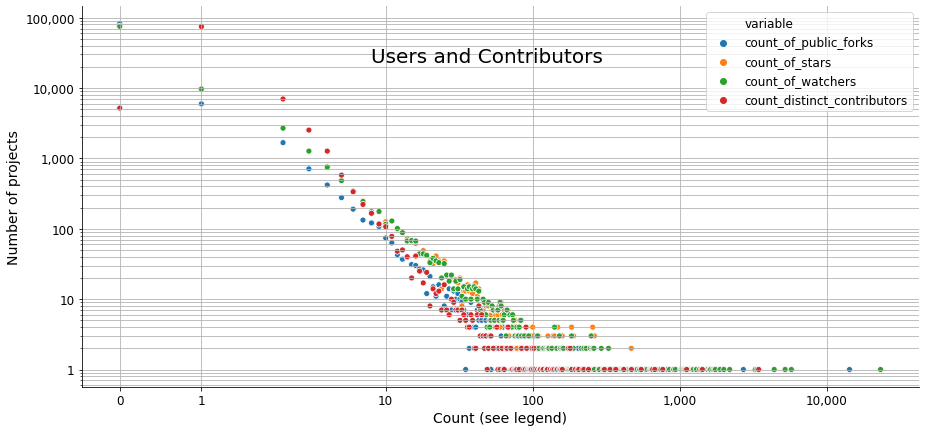

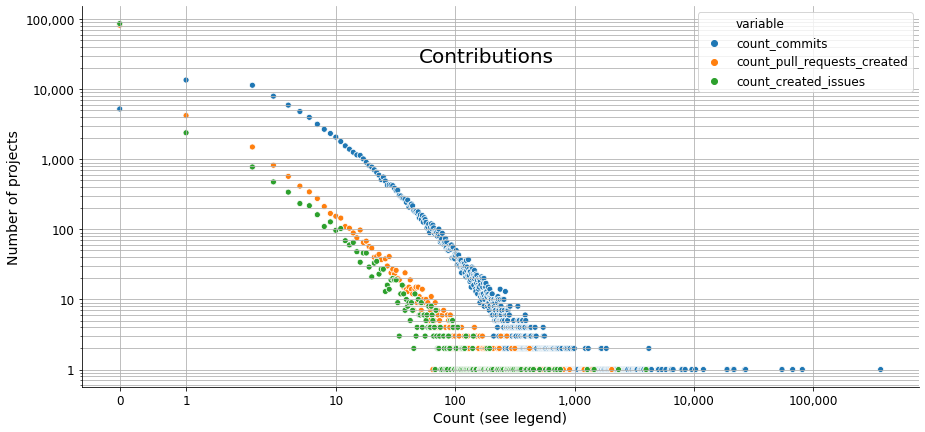

In [6]:
projects['primary_language_name'].fillna('none').astype('category')

counts = [
    'count_of_public_forks',
    'count_of_stars',
    'count_of_watchers',
    'count_distinct_contributors',
    'count_contributions',
    'count_commits',        
    'count_commit_comments', 
    'count_created_issues', 
    'count_pull_requests_created',
    'count_pull_requests_reviews',
    'count_comments_on_issues_and_pull_requests']


#sns.boxplot(data = projects, order=counts, orient = "h")
#plt.show()

countHists = {}
for col in counts:
    countHists[col] = projects[col].value_counts()
    #print(countHists)

def plot_counts(cols, suptitle='suptitle'):
    selectedHists = { col: countHists[col] for col in cols }
    dfHists = pd.DataFrame.from_dict(selectedHists)
    dfLong = pd.melt(dfHists.reset_index(), id_vars='index', value_vars=cols, value_name='n_projects').dropna()
    # print(dfLong)
    f, ax = plt.subplots(figsize=(15,7))
    f.suptitle(suptitle, y=.8)
    sns.scatterplot(data=dfLong, x='index', y='n_projects', hue='variable', ax=ax )
    # sns.distplot(data=dfLong, x='index', y='n_projects', hue='variable', ax=ax )
    sns.despine(offset=0)
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    ax.set_xscale("symlog")
    ax.set_yscale("log")
    ax.xaxis.set_major_formatter(COMMA_FMT)
    ax.yaxis.set_major_formatter(COMMA_FMT)
    ax.set_xlabel('Count (see legend)')
    ax.set_ylabel('Number of projects')

    plt.grid(axis='both', which='both')
    plt.show()
    
plot_counts([    
    'count_of_public_forks',
    'count_of_stars',
    'count_of_watchers',
    'count_distinct_contributors',
], suptitle='Users and Contributors')    
    
plot_counts([    
    'count_commits',
    'count_pull_requests_created',
    'count_created_issues'
], suptitle='Contributions')    
    
    
    



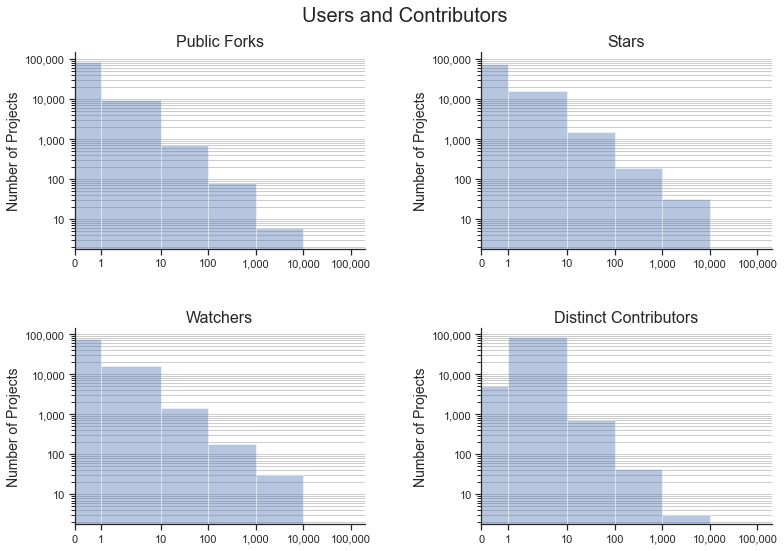

In [7]:
def count_format(col_name):
        lab = col_name.replace('variable = count_','').replace('of_','').replace('_',' ').title()
        return lab

def plot_counts2(cols, suptitle='suptitle'):
    sns.set(style="ticks")
    selected = projects[cols]
    long_frame = pd.melt(selected, value_vars=cols, value_name='n_projects').dropna()

    # print(long_frame)
    g = sns.FacetGrid(long_frame, col='variable', col_wrap=2 if len(cols)>3 else 2, height=4, aspect=1.33)
    g = g.map(sns.distplot, 'n_projects', kde=False, norm_hist=False, bins=[0,1,10,100,1000,10000,100000])
    g.set(xscale="symlog", yscale="log", xlim=(0, 200000), xlabel='')
    g.fig.subplots_adjust(top=.9,wspace=.4, hspace=.4)
    g.fig.suptitle(suptitle)
    for ax in g.axes.flatten():
        ax.grid(axis='y', which='both')
        ax.set_title(count_format(ax.get_title()), fontsize=16)
        ax.set_ylabel('Number of Projects', fontsize=14)
        ax.xaxis.set_major_formatter(COMMA_FMT)
        ax.yaxis.set_major_formatter(COMMA_FMT)
        # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# sns.scatterplot(data=dfLong, x='index', y='n_projects', hue='variable', ax=ax )
    # sns.distplot(data=dfLong, x='index', y='n_projects', hue='variable', ax=ax )
    sns.despine(offset=0)
    plt.show()
    
plot_counts2([    
    'count_of_public_forks',
    'count_of_stars',
    'count_of_watchers',
    'count_distinct_contributors',
], suptitle='Users and Contributors')    
    

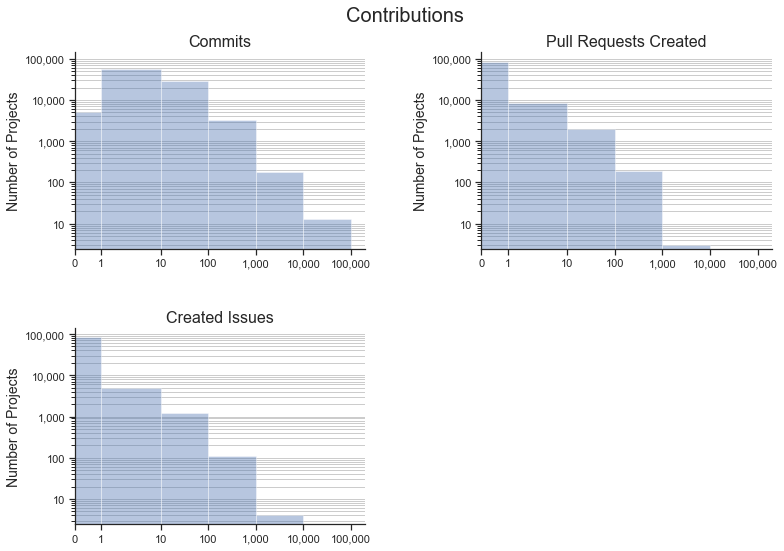

In [8]:
plot_counts2([    
    'count_commits',
    'count_pull_requests_created',
    'count_created_issues'
], suptitle='Contributions')    

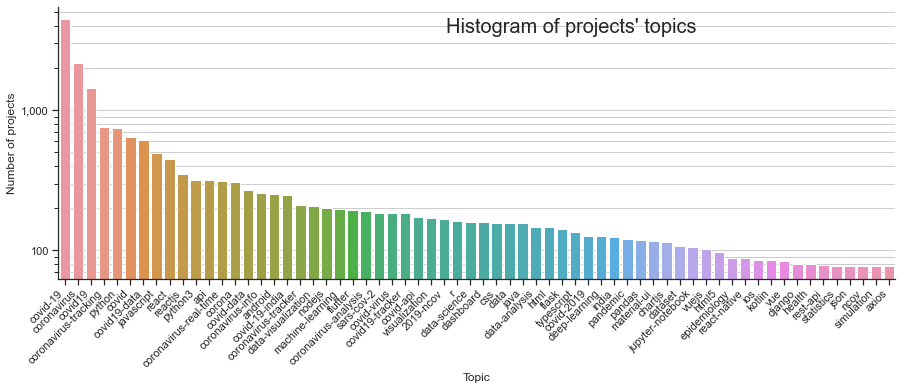

In [9]:
topics = projects['topics'].str.split(', ').dropna()
# print(topics)
flat_topics = topics.explode()
# print(flat_topics)

topic_counts = flat_topics.value_counts()
big_topic_counts = topic_counts[topic_counts > 75]
# print(big_topic_counts)


fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(ax=ax, x=big_topic_counts.index, y=big_topic_counts.values)

fig.suptitle('Histogram of projects\' topics', x=.6, y=.85)
ax.set_yscale("log")
ax.set_xlabel('Topic')
ax.set_ylabel('Number of projects')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(COMMA_FMT)
sns.despine()
plt.grid(axis='y', which='both')
plt.show()
